In [1]:
# Don't forget to execute this cell
import bionetgen
import matplotlib.pyplot as plt

# PyBioNetGen - a simple library for BioNetGen models

*PyBioNetGen* (PyBNG) is designed to be simple library to read and manipulate BNGL models that also serves as a convenient way to install bionetgen and quickly run models either from the command line or via python scripting. This library will also be the main platform for future development, we are working on improved model parsing and efficient simulators. 

This notebook is designed to showcase the features of the library side of PyBNG and simple things you can do directly from a python environment. See [here](https://pybionetgen.readthedocs.io/) for PyBNG documentation. 

## Running models 

PyBNG comes with a simple `run` command that simply executes the model you give it. 

In [2]:
# this command runs the model in a temporary folder which is removed after execution is done
results = bionetgen.run("organelle_transport.bngl") 

BioNetGen version 2.6.0
Reading from file /home/boltzmann/Workshop_2021/bionetgen/pybionetgen/organelle_transport.bngl (level 0)
Read 29 parameters.
Read 5 compartments.
Read 9 molecule types.
Read 4 species.
Read 4 observable(s).
Read 7 reaction rule(s).
ACTION: generate_network( organelle_transport )
Iteration   0:     4 species      0 rxns  0.00e+00 CPU s
Iteration   1:     5 species      1 rxns  0.00e+00 CPU s
Iteration   2:     6 species      3 rxns  1.00e-02 CPU s
Iteration   3:     7 species      4 rxns  0.00e+00 CPU s
Iteration   4:     8 species      5 rxns  0.00e+00 CPU s
Iteration   5:     9 species      7 rxns  0.00e+00 CPU s
Iteration   6:    10 species      8 rxns  0.00e+00 CPU s
Iteration   7:    11 species     10 rxns  1.00e-02 CPU s
Iteration   8:    11 species     10 rxns  0.00e+00 CPU s
Cumulative CPU time for each rule
Rule   1:     2 reactions 1.00e-02 CPU s 5.00e-03 CPU s/rxn
Rule   2:     1 reactions 0.00e+00 CPU s 0.00e+00 CPU s/rxn
Rule   3:     1 reactions 0.0

In [3]:
# we'll come back to this folder, so let's keep the path
curr_dir = os.getcwd()
# you can optionally give a folder name to run the model under, files won't be removed
result_obj = bionetgen.run("organelle_transport.bngl", out="results/my_model") # in folder "my_output"

BioNetGen version 2.6.0
Reading from file /home/boltzmann/Workshop_2021/bionetgen/pybionetgen/organelle_transport.bngl (level 0)
Read 29 parameters.
Read 5 compartments.
Read 9 molecule types.
Read 4 species.
Read 4 observable(s).
Read 7 reaction rule(s).
ACTION: generate_network( organelle_transport )
Iteration   0:     4 species      0 rxns  0.00e+00 CPU s
Iteration   1:     5 species      1 rxns  1.00e-02 CPU s
Iteration   2:     6 species      3 rxns  2.00e-02 CPU s
Iteration   3:     7 species      4 rxns  0.00e+00 CPU s
Iteration   4:     8 species      5 rxns  0.00e+00 CPU s
Iteration   5:     9 species      7 rxns  1.00e-02 CPU s
Iteration   6:    10 species      8 rxns  0.00e+00 CPU s
Iteration   7:    11 species     10 rxns  0.00e+00 CPU s
Iteration   8:    11 species     10 rxns  0.00e+00 CPU s
Cumulative CPU time for each rule
Rule   1:     2 reactions 1.00e-02 CPU s 5.00e-03 CPU s/rxn
Rule   2:     1 reactions 2.00e-02 CPU s 2.00e-02 CPU s/rxn
Rule   3:     1 reactions 0.0

In [4]:
# please note that running with an output folder will place you in the folder you selected
print(os.getcwd())

/home/boltzmann/Workshop_2021/bionetgen/pybionetgen/results/my_model


`run` command automatically reads all the output files and returns a results object. All output files are converted into `numpy record arrays`, see [here](https://numpy.org/doc/stable/reference/generated/numpy.recarray.html) for more information.

In [5]:
print(results) # this gives you a summary of what's stored in the object

gdats from 1 models: organelle_transport
cdats from 1 models: organelle_transport


In [6]:
results.gdats["organelle_transport"] # you can look at gdats file via the gdats attribute

rec.array([(0.00e+00, 1200., 1000.,   0.,   0.),
           (1.00e-05, 1200., 1000.,   0.,   0.),
           (2.00e-05, 1200., 1000.,   0.,   0.), ...,
           (9.98e-03,  408.,  208., 482., 309.),
           (9.99e-03,  404.,  205., 486., 309.),
           (1.00e-02,  403.,  204., 487., 309.)],
          dtype=[('time', '<f8'), ('A', '<f8'), ('B', '<f8'), ('C', '<f8'), ('D', '<f8')])

In [7]:
results[0] # or by indexing which defaults to loaded gdat files

rec.array([(0.00e+00, 1200., 1000.,   0.,   0.),
           (1.00e-05, 1200., 1000.,   0.,   0.),
           (2.00e-05, 1200., 1000.,   0.,   0.), ...,
           (9.98e-03,  408.,  208., 482., 309.),
           (9.99e-03,  404.,  205., 486., 309.),
           (1.00e-02,  403.,  204., 487., 309.)],
          dtype=[('time', '<f8'), ('A', '<f8'), ('B', '<f8'), ('C', '<f8'), ('D', '<f8')])

In [8]:
results.cdats["organelle_transport"] # for other types of files you need to manually select them

rec.array([(0.00e+00, 1200., 1000., 700., 700., 0.,  0.,  0., 0.,   0., 0.,   0.),
           (1.00e-05, 1200., 1000., 700., 700., 0.,  0.,  0., 0.,   0., 0.,   0.),
           (2.00e-05, 1199., 1000., 700., 700., 0.,  1.,  0., 0.,   0., 0.,   0.),
           ...,
           (9.98e-03,  387.,  208., 699., 700., 0., 21., 72., 1., 410., 0., 309.),
           (9.99e-03,  386.,  205., 699., 700., 1., 18., 75., 0., 411., 0., 309.),
           (1.00e-02,  384.,  204., 699., 700., 1., 19., 75., 0., 412., 0., 309.)],
          dtype=[('time', '<f8'), ('S1', '<f8'), ('S2', '<f8'), ('S3', '<f8'), ('S4', '<f8'), ('S5', '<f8'), ('S6', '<f8'), ('S7', '<f8'), ('S8', '<f8'), ('S9', '<f8'), ('S10', '<f8'), ('S11', '<f8')])

You can index the record arrays with observable names. This allows for quick plotting of results or doing analysis on the time series generated by BNG. 

In [9]:
r = results[0] # let's get the gdat record array
print(r.dtype.names) # this will print the names of the observables you can select

('time', 'A', 'B', 'C', 'D')


Let's plot each time series that is loaded in. 

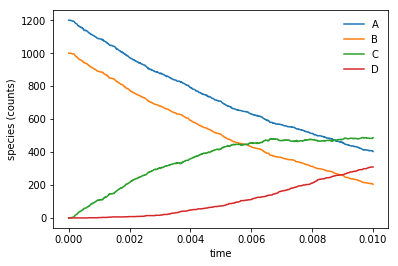

In [10]:
for name in r.dtype.names:
    if name != "time":
        plt.plot(r['time'], r[name], label=name)
plt.xlabel("time")
plt.ylabel("species (counts)")
_ = plt.legend(frameon=False)

PyBNG also comes with basic BNGL parsing capabilities. We are working on a much better parsing solution using C++ and that will become the default way to parse models in the future. This creates a simple model object that allows some basic programmatic manipulation of the model.

In [11]:
# since we moved directories, we don't have the BNGL in the folder we are in right now, we need to go back
print(os.listdir(os.getcwd()))
os.chdir(curr_dir)
model = bionetgen.bngmodel("organelle_transport.bngl")

['organelle_transport.net', 'organelle_transport.cdat', 'organelle_transport.gdat', 'organelle_transport_sbml.xml']


This model object is written with BNGL in mind, so printing the model or individual blocks will give you the BNGL of that portion of the model.

In [12]:
print(model)

begin model

begin parameters
  NA_um3 6.02e+8
  d 0.01
  vol_CYT 1
  vol_O1M 1*d
  vol_O1V 0.133
  vol_O2M 1*d
  vol_O2V 0.0335
  kp_AB 1e9/NA_um3
  kp_AT1 1e8/NA_um3
  km_AT1 10
  k_AT1trans 100000
  kp_CT1 1e8/NA_um3
  km_CT1 10
  k_CT1trans 100000
  kp_CT2 1e8/NA_um3
  km_CT2 10
  k_DT2trans 100000
  D_VOL 1e-6
  D_SURF 1e-8
  MCELL_DIFFUSION_CONSTANT_3D_A D_VOL
  MCELL_DIFFUSION_CONSTANT_3D_B D_VOL
  MCELL_DIFFUSION_CONSTANT_3D_C D_VOL
  MCELL_DIFFUSION_CONSTANT_3D_D D_VOL
  MCELL_DIFFUSION_CONSTANT_2D_T1 D_SURF
  MCELL_DIFFUSION_CONSTANT_2D_AT1 D_SURF
  MCELL_DIFFUSION_CONSTANT_2D_CT1 D_SURF
  MCELL_DIFFUSION_CONSTANT_2D_T2 D_SURF
  MCELL_DIFFUSION_CONSTANT_2D_CT2 D_SURF
  ITERATIONS 10000
end parameters

begin compartments
  CYT 3 1
  O1M 2 0.01 CYT
  O1V 3 0.133 O1M
  O2M 2 0.01 CYT
  O2V 3 0.0335 O2M
end compartments

begin molecule types
  A()
  AT1()
  B()
  C()
  CT1()
  CT2()
  D()
  T1()
  T2()
end molecule types

begin species
  @CYT:A()@CYT 1200
  @O1V:B()@O1V 1000
  @O

In [11]:
print(model.parameters)


begin parameters
  NA_um3 6.02e+8
  d 0.01
  vol_CYT 1
  vol_O1M 1*d
  vol_O1V 0.133
  vol_O2M 1*d
  vol_O2V 0.0335
  kp_AB 1e9/NA_um3
  kp_AT1 1e8/NA_um3
  km_AT1 10
  k_AT1trans 100000
  kp_CT1 1e8/NA_um3
  km_CT1 10
  k_CT1trans 100000
  kp_CT2 1e8/NA_um3
  km_CT2 10
  k_DT2trans 100000
  D_VOL 1e-6
  D_SURF 1e-8
  MCELL_DIFFUSION_CONSTANT_3D_A D_VOL
  MCELL_DIFFUSION_CONSTANT_3D_B D_VOL
  MCELL_DIFFUSION_CONSTANT_3D_C D_VOL
  MCELL_DIFFUSION_CONSTANT_3D_D D_VOL
  MCELL_DIFFUSION_CONSTANT_2D_T1 D_SURF
  MCELL_DIFFUSION_CONSTANT_2D_AT1 D_SURF
  MCELL_DIFFUSION_CONSTANT_2D_CT1 D_SURF
  MCELL_DIFFUSION_CONSTANT_2D_T2 D_SURF
  MCELL_DIFFUSION_CONSTANT_2D_CT2 D_SURF
  ITERATIONS 10000
end parameters



The model is also written with python in mind and the objects behave in a pythonic manner whenever possible. For more information, please check the model documentation [here](https://pybionetgen.readthedocs.io/en/latest/bngmodel.html)

In [16]:
for block in model:
    print(block.name)
    if block.name == "parameters":
        print(f"Looping over block: {block.name}")
        for param in block:
            print(f"parameter name: {param}, value: {model.parameters[param]}")
    elif block.name == "compartments": 
        print(f"Looping over block: {block.name}")
        for comp in model.compartments:
            c = model.compartments[comp]
            print(f"compartment name: {c.name}, dimensionality: {c.dim}, size: {c.size}")

parameters
Looping over block: parameters
parameter name: NA_um3, value: NA_um3 6.02e+8
parameter name: d, value: d 0.01
parameter name: vol_CYT, value: vol_CYT 1
parameter name: vol_O1M, value: vol_O1M 1*d
parameter name: vol_O1V, value: vol_O1V 0.133
parameter name: vol_O2M, value: vol_O2M 1*d
parameter name: vol_O2V, value: vol_O2V 0.0335
parameter name: kp_AB, value: kp_AB 1e9/NA_um3
parameter name: kp_AT1, value: kp_AT1 1e8/NA_um3
parameter name: km_AT1, value: km_AT1 10
parameter name: k_AT1trans, value: k_AT1trans 100000
parameter name: kp_CT1, value: kp_CT1 1e8/NA_um3
parameter name: km_CT1, value: km_CT1 10
parameter name: k_CT1trans, value: k_CT1trans 100000
parameter name: kp_CT2, value: kp_CT2 1e8/NA_um3
parameter name: km_CT2, value: km_CT2 10
parameter name: k_DT2trans, value: k_DT2trans 100000
parameter name: D_VOL, value: D_VOL 1e-6
parameter name: D_SURF, value: D_SURF 1e-8
parameter name: MCELL_DIFFUSION_CONSTANT_3D_A, value: MCELL_DIFFUSION_CONSTANT_3D_A D_VOL
parame

Simple manipulations of the model object is possible, particularly static values (e.g. parameter values, compartment sizes, initial species counts). This allows for some very simple analyses that can be done using this API. Please note that this is a fairly inefficient implementation for complicated analyses since this process writes does a lot of file I/O. We will talk more about more efficient ways to implement analyses in the advanced topics lesson.

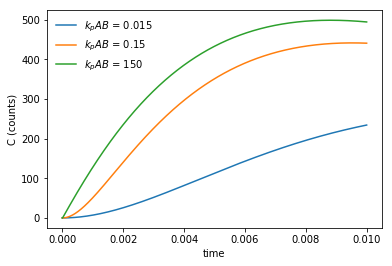

In [17]:
model.add_action("simulate", action_args=[("method","ode"),("t_end",0.01),("n_steps",1000)])
for i in [0.015,0.15,150]:
    model.parameters.kp_AB = i
    # run can also take a model object as an argument
    # you can also suppress BNG output by using the keyword argument "suppress"
    result = bionetgen.run(model, suppress=True)
    plt.plot(result[0]['time'], result[0]['C'], label="$k_{p} AB$ = "+f"{i}")
_ = plt.xlabel("time")
_ = plt.ylabel("C (counts)")
_ = plt.legend(frameon=False)